In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.metrics import mean_squared_error
from pandas import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.stattools import adfuller

In [86]:
df = pd.read_csv('data/SOXL.csv')
df = df.iloc[::-1]
df = df.reset_index()
df['date'] = pd.DatetimeIndex(df.Date).normalize()
df = df.drop(['Date'], axis=1)
df.index = df.date
df = df.drop(['date'], axis=1)
df = df.drop(['index'], axis=1)
df.head()

,Close/Last,Volume,Open,High,Low
date,,,,,
2015-10-26,27.97,525916,29.35,29.390,27.7001
2015-10-27,27.39,393162,27.40,27.970,27.1900
2015-10-28,28.81,488800,27.91,28.827,27.6300
2015-10-29,26.28,490322,27.08,27.170,26.0510
2015-10-30,26.95,328555,26.45,27.200,26.4500


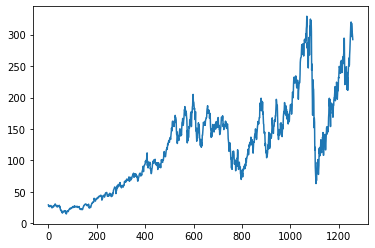

In [43]:
plt.plot(df["Open"])
plt.show()

In [44]:
series = df["Open"]
X = series.values
size = int(len(X) * 0.66)
train_vd, test_vd = X[0:size], X[size:len(X)]
history_vd = [x for x in train_vd]
predictions_vd = list()
# parameters can be adjusted. Given more time, I would do more analysis to optimize them better.
for t in range(len(test_vd)):
    model = ARIMA(history_vd, order=(7,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_vd.append(yhat)
    obs = test_vd[t]
    history_vd.append(obs)
error_vd = mean_squared_error(test_vd, predictions_vd)
print('Test MSE: {}'.format(error_vd))

C:\Users\austi\newAnaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\austi\newAnaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.ex

Test MSE: 138.61960257140845


In [68]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# seasonal difference
X = series.values
year = 365
differenced = difference(X, year)
# fit model
model = ARIMA(differenced, order=(7,1,1))
model_fit = model.fit(disp=0)
# out-of-sample forecast
forecast = model_fit.forecast(steps=30)[0]
history = [x for x in X]
out_of_sample_forecast_vd = []
for yhat in forecast:
    inverted = inverse_difference(history, yhat, year)
    out_of_sample_forecast_vd.append(inverted)
    history.append(inverted)


In [71]:
# seasonal difference
X = series.values
year = 365
differenced = difference(X, year)
# fit model
model = ARIMA(differenced, order=(7,1,1))
model_fit = model.fit(disp=0)
# out-of-sample forecast
forecast7 = model_fit.forecast(steps=7)[0]
history = [x for x in X]
out_of_sample_forecast_vd7 = []
for yhat in forecast7:
    inverted = inverse_difference(history, yhat, year)
    out_of_sample_forecast_vd7.append(inverted)
    history.append(inverted)

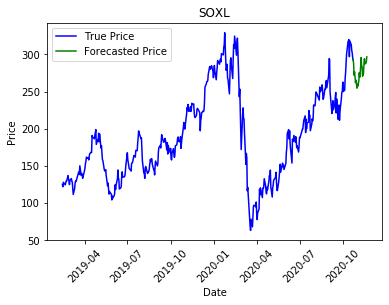

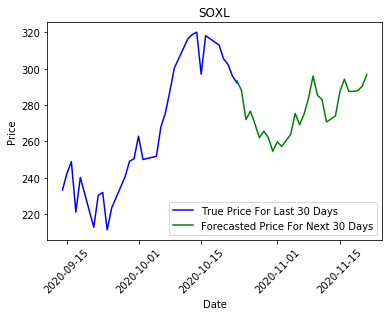

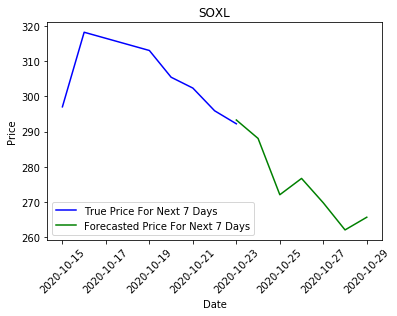

In [81]:
# plot
forecast_dates = pd.date_range(start='10/23/2020', end='11/21/2020')
forecast_dates7 = pd.date_range(start='10/23/2020', end='10/29/2020')

dates = list(df["Open"].index)
plt.plot(dates[len(train_vd):], test_vd, color='blue', label="True Price")
# plt.plot(dates[len(train_vd):], predictions_vd, color='red', label="Predicted Price")
plt.plot(forecast_dates, out_of_sample_forecast_vd, color="Green", label='Forecasted Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('SOXL')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()


plt.plot(dates[len(train_vd):][-30:], test_vd[-30:], color='blue', label="True Price For Last 30 Days")
# plt.plot(dates[len(train_vd):][-30:], predictions_vd[-30:], color='red', label="Predicted Price")
plt.plot(forecast_dates, out_of_sample_forecast_vd, color="Green", label='Forecasted Price For Next 30 Days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('SOXL')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()

plt.plot(dates[len(train_vd):][-7:], test_vd[-7:], color='blue', label="True Price For Next 7 Days")
# plt.plot(dates[len(train_vd):][-7:], predictions_vd[-7:], color='red', label="Predicted Price")
plt.plot(forecast_dates7, out_of_sample_forecast_vd7, color="Green", label='Forecasted Price For Next 7 Days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('SOXL')
plt.legend(loc='lower left')
plt.xticks(rotation=45)
plt.show()